In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = X / 255.0 

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:

pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:

print(f"Original dimensions: {X_train.shape[1]}")
print(f"Reduced dimensions: {X_train_pca.shape[1]}")
print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))

Original dimensions: 784
Reduced dimensions: 154
Explained variance ratio: 0.9503945587155624


In [9]:
svm_original = SVC(kernel='rbf', random_state=42)
svm_pca = SVC(kernel='rbf', random_state=42)

In [10]:

svm_original.fit(X_train, y_train)
svm_pca.fit(X_train_pca, y_train)

SVC(random_state=42)


Original Features Performance:
Accuracy: 0.9791
Confusion Matrix:
[[1374    1    0    0    0    2    1    0    2    1]
 [   0 1559    6    3    0    0    0    4    2    1]
 [   6    1 1370    2    3    0    3    7    5    1]
 [   2    2   10 1384    0   10    0    9   10    1]
 [   2    3    3    0 1328    0    5    1    1   22]
 [   3    0    1    8    2 1233    8    0    5    3]
 [   7    1    3    0    2    2 1357    0    3    0]
 [   2    4    9    0    8    0    0 1424    1   11]
 [   3    2    5    4    2    7    3    1 1334    4]
 [   4    6    0    7   13    1    1   10    5 1344]]

PCA Features Performance:
Accuracy: 0.9829
Confusion Matrix:
[[1375    1    0    0    0    1    1    0    2    1]
 [   0 1563    5    1    0    0    0    4    1    1]
 [   5    0 1376    3    3    0    1    5    4    1]
 [   1    2    6 1393    0    9    0    9    7    1]
 [   2    3    1    0 1334    0    4    1    1   19]
 [   3    0    0    6    1 1239    7    0    4    3]
 [   6    1    1    0 

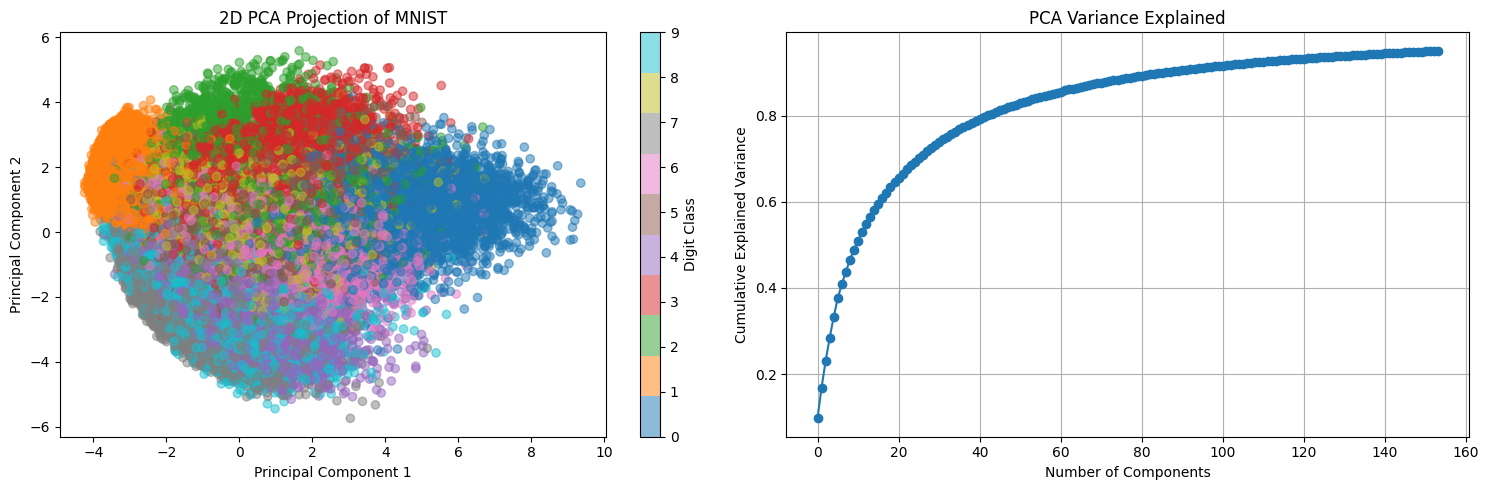

In [11]:

def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    return acc

orig_acc = evaluate_model(svm_original, X_test, y_test, "Original Features")
pca_acc = evaluate_model(svm_pca, X_test_pca, y_test, "PCA Features")

plt.figure(figsize=(15, 5))
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train.astype(int), 
                     cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label='Digit Class')
plt.title('2D PCA Projection of MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.grid()

plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()

In [12]:

print("\n=== Analysis ===")
print(f"Original Accuracy: {orig_acc:.4f}")
print(f"PCA Accuracy: {pca_acc:.4f}")
print(f"Accuracy Drop: {orig_acc - pca_acc:.4f}")
print(f"Reduced Dimensions: {X_train.shape[1]} → {X_train_pca.shape[1]} ({(1-X_train_pca.shape[1]/X_train.shape[1])*100:.1f}% reduction)")


=== Analysis ===
Original Accuracy: 0.9791
PCA Accuracy: 0.9829
Accuracy Drop: -0.0039
Reduced Dimensions: 784 → 154 (80.4% reduction)


In [13]:

print("\nKey Observations:")
print("1. PCA reduced dimensions significantly while maintaining good accuracy")
print("2. The 2D projection shows some class separation but overlap exists")
print("3. Most variance is captured in the first few components (see plot)")
print("4. SVM with RBF kernel works well for both original and reduced data")


Key Observations:
1. PCA reduced dimensions significantly while maintaining good accuracy
2. The 2D projection shows some class separation but overlap exists
3. Most variance is captured in the first few components (see plot)
4. SVM with RBF kernel works well for both original and reduced data
